# Задание на метрические методы классификации, построение конвейеров и поиск гиперпараметров по сетке.

Для удобства проверки решение назовите `[Имя]_[Фамилия].ipynb`, например `Ivan_Ivanov.ipynb`.

In [1]:
!python --version

Python 3.12.2


In [5]:
!python -m pip install matplotlib

In [6]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [ ]:
import sklearn
import pandas as pd

pd.set_option("display.max_columns", None)
# from ydata_profiling import ProfileReport  # установка: conda install -c conda-forge ydata-profiling

In [ ]:
data = datasets.fetch_openml(
    name="wdbc", version=1, parser="auto", data_home="datasets", as_frame=True
)

In [39]:
data.DESCR

'**Author**: William H. Wolberg, W. Nick Street, Olvi L. Mangasarian    \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)), [University of Wisconsin](http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html) - 1995  \n**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)     \n\n**Breast Cancer Wisconsin (Diagnostic) Data Set (WDBC).** Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The target feature records the prognosis (benign (1) or malignant (2)). [Original data available here](ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/) \n\nCurrent dataset was adapted to ARFF format from the UCI version. Sample code ID\'s were removed.  \n\n! Note that there is also a related Breast Cancer Wisconsin (Original) Data Set with a different set of features, better known as [breast-w](https://www.openml.or

In [ ]:
X = data.data
Y = data.target

In [41]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
len(X), len(X.columns)

(569, 30)

In [43]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: category
Categories (2, object): ['1', '2']

In [ ]:
Y = Y.cat.rename_categories([0, 1]).astype(int)

In [45]:
Y.unique()

array([1, 0])

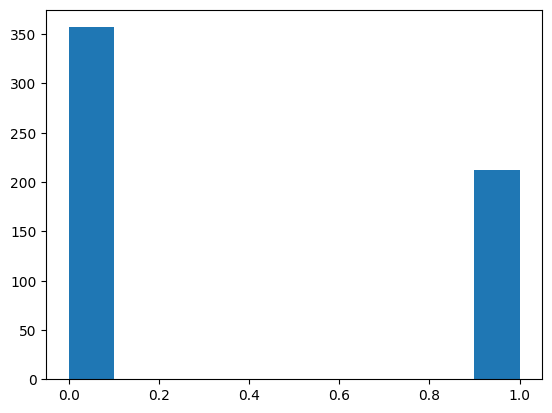

In [ ]:
Y.hist(grid=False)

In [ ]:
Z = X.copy()
Z["Y"] = Y

In [48]:
np.random.seed(0)
Z = Z.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

Z_train, Z_test = train_test_split(
    Z, test_size=0.4, shuffle=True, random_state=0, stratify=Z["Y"]
)  # разделим в на обучение/тест в заданной пропорции

len(Z), len(Z_train), len(Z_test)

(569, 341, 228)

In [ ]:
def XY_split(Z):
    """Функция разбиения по признаки и отклики"""
    Y = Z["Y"]
    X = Z.copy()
    X = X.drop("Y", axis=1)
    return X, Y


X_train, Y_train = XY_split(Z_train)
X_test, Y_test = XY_split(Z_test)

# Анализ данных (для всей выборки X,Y)

### 1. Сколько представителей целевого класса (=1)?

In [ ]:
print(f"1st class: {Z.Y.sum()}")
print(f"Ratio : {Z.Y.sum() / Z.shape[0]}")

1st class: 212
Ratio : 0.37258347978910367


### 2. Сколько признаков невещественного типа (не float64) в матрице X?

In [62]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      569 non-null    float64
 1   V2      569 non-null    float64
 2   V3      569 non-null    float64
 3   V4      569 non-null    float64
 4   V5      569 non-null    float64
 5   V6      569 non-null    float64
 6   V7      569 non-null    float64
 7   V8      569 non-null    float64
 8   V9      569 non-null    float64
 9   V10     569 non-null    float64
 10  V11     569 non-null    float64
 11  V12     569 non-null    float64
 12  V13     569 non-null    float64
 13  V14     569 non-null    float64
 14  V15     569 non-null    float64
 15  V16     569 non-null    float64
 16  V17     569 non-null    float64
 17  V18     569 non-null    float64
 18  V19     569 non-null    float64
 19  V20     569 non-null    float64
 20  V21     569 non-null    float64
 21  V22     569 non-null    float64
 22  V2

In [78]:
unique_value_counts = X.apply(lambda s: s.nunique())
unique_value_counts.sort_values()

V25    411
V9     432
V1     456
V21    457
V5     474
V2     479
V28    492
V19    498
V10    499
V29    500
V18    507
V22    511
V23    514
V12    519
V3     522
V14    528
V26    529
V13    533
V17    533
V30    535
V7     537
V6     537
V27    539
V4     539
V11    540
V16    541
V8     542
V24    544
V20    545
V15    547
dtype: int64

In [152]:
numeric_features = unique_value_counts.index.tolist()
categorical_features = []

 Все фичи вещественные

### 3. Чему равно стандартное отклонение для признака с максимальной дисперсией? Что это за признак?

Используйте `Series.sort_values()`

In [ ]:
X.describe().T.sort_values("std", ascending=False)["std"] ** 2

V24    324167.385102
V4     123843.554318
V14      2069.431583
V23      1129.130847
V3        590.440480
V22        37.776483
V21        23.360224
V2         18.498909
V1         12.418920
V13         4.087896
V12         0.304316
V11         0.076902
V27         0.043524
V26         0.024755
V7          0.006355
V28         0.004321
V29         0.003828
V6          0.002789
V8          0.001506
V17         0.000911
V9          0.000752
V25         0.000521
V30         0.000326
V16         0.000321
V5          0.000198
V19         0.000068
V10         0.000050
V18         0.000038
V15         0.000009
V20         0.000007
Name: std, dtype: float64

In [ ]:
569.356993**2

324167.385478002

Максимальное стандартное отклонение у признака V24: 569.356993 (дисперсия: 324167.385478002)

### 3. Чему равно стандартное отклонение для признака с минимальной дисперсией? Что это за признак?

Можете воспользоваться `Series.sort_values()`

In [ ]:
0.002646**2

7.001316e-06

Минимальное стандартное отклонение у признака V20: 0.002646 (дисперсия: 7.001316e-06)

# Важности признаков

### 4. Запустите `RandomForestClassifier(n_estimators=50, random_state=0)`. Какие 3 самых важных признака для классификации?

In [244]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, random_state=0)
model = model.fit(X_train, Y_train)
model.feature_importances_

array([0.02977563, 0.0144128 , 0.06493665, 0.03472638, 0.00489234,
       0.00576238, 0.04658907, 0.07659673, 0.00611846, 0.00419594,
       0.03534856, 0.00647871, 0.01623465, 0.04928676, 0.0047393 ,
       0.00358014, 0.00468097, 0.00355197, 0.0042087 , 0.00607656,
       0.08657827, 0.01672222, 0.18232453, 0.09303533, 0.01379969,
       0.0085697 , 0.01782767, 0.14191106, 0.00863467, 0.00840414])

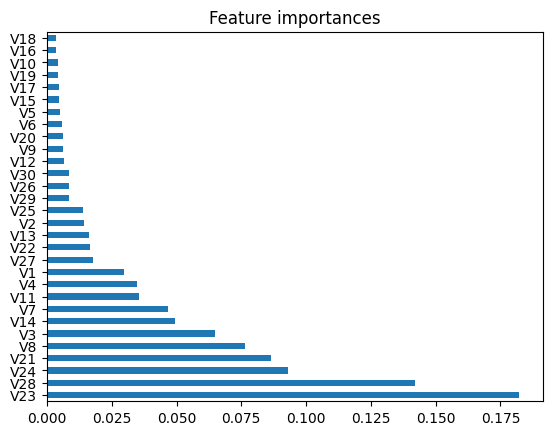

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(200).plot(kind="barh", title="Feature importances")

In [170]:
feat_importances.nlargest()

V23    0.182325
V28    0.141911
V24    0.093035
V21    0.086578
V8     0.076597
dtype: float64

In [83]:
feat_importances.nlargest(3)

V23    0.182325
V28    0.141911
V24    0.093035
dtype: float64

3 самых важных признака для классификации: V23, V28, V24

### 5. Какой признак содержит больше всего повторяющихся значений? Есть ли признаки с числом уникальных значений меньше 10?

Можете использовать `series.nunique()` и `Series.sort_values()`

In [84]:
unique_value_counts = X.apply(lambda s: s.nunique())
unique_value_counts.sort_values()

V25    411
V9     432
V1     456
V21    457
V5     474
V2     479
V28    492
V19    498
V10    499
V29    500
V18    507
V22    511
V23    514
V12    519
V3     522
V14    528
V26    529
V13    533
V17    533
V30    535
V7     537
V6     537
V27    539
V4     539
V11    540
V16    541
V8     542
V24    544
V20    545
V15    547
dtype: int64

больше всего повторяющихся значений: V15  --  547


Есть ли признаки с числом уникальных значений меньше 10?: Таких фичей нет

### 6.Постройте матрицу попарных корреляций внутри Z (X дополненный Y) и визуализируйте её.

Можете использовать один из [следующих подходов](https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas).

In [ ]:
corr = Z.corr()
corr.style.background_gradient(cmap="coolwarm")

NameError: name 'Z' is not defined

### 7. Какие пары признаков скоррелированы более чем на 0.99?

In [109]:
corr[(corr > 0.99)]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Y
V1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V7,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


V3 и V1	0.997855

V21 и V23 0.993708

### 8. Какие признаки скоррелированы с откликом Y более чем на 0.75?

In [113]:
corr.Y[corr.Y > 0.75].dropna()

V8     0.776614
V21    0.776454
V23    0.782914
V28    0.793566
Y      1.000000
Name: Y, dtype: float64

V8     0.776614

V21    0.776454

V23    0.782914

V28    0.793566

# Прогнозирование

### 10. Какая точность у метода ближайших центроидов, применённого к исходным данным?

## Метод ближайших центроидов

In [125]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
model = NearestCentroid()
model.fit(X_train, Y_train)
Y_hat = model.predict(X_test)

In [ ]:
def show_accuracy(Y_test, Y_hat):
    acc = sklearn.metrics.accuracy_score(Y_test, Y_hat)
    print(f"Accuracy: {acc:.2f}")

    cm = sklearn.metrics.confusion_matrix(
        Y_test, Y_hat
    )  # матрица счётчиков true_class x predicted_class
    disp = sklearn.metrics.ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=model.classes_
    )
    disp.plot()

Accuracy: 0.90


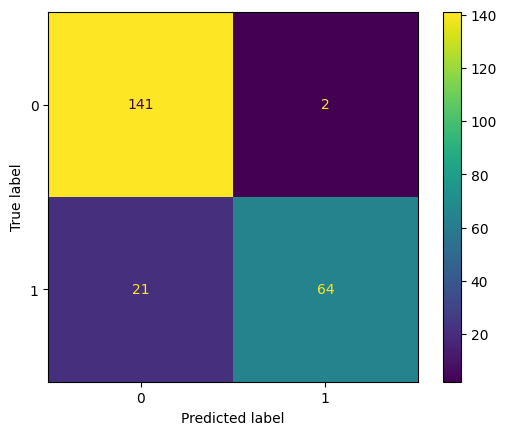

In [ ]:
model = sklearn.neighbors.NearestCentroid()
model.fit(X_train, Y_train)
Y_hat = model.predict(X_test)

show_accuracy(Y_test, Y_hat)

In [ ]:
print(metrics.classification_report(y_true=Y_test, y_pred=Y_hat))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       143
           1       0.97      0.75      0.85        85

    accuracy                           0.90       228
   macro avg       0.92      0.87      0.89       228
weighted avg       0.91      0.90      0.90       228



### 11. Каких ошибок больше совершает метод ближайших центроидов: 1-й класс называет 0-м или 0-й класс 1-м?

False Negative :1-й класс называет 0-м

### 11. Какая точность у метода 3-х ближайших соседей, применённого к исходным данным?

Accuracy: 0.91


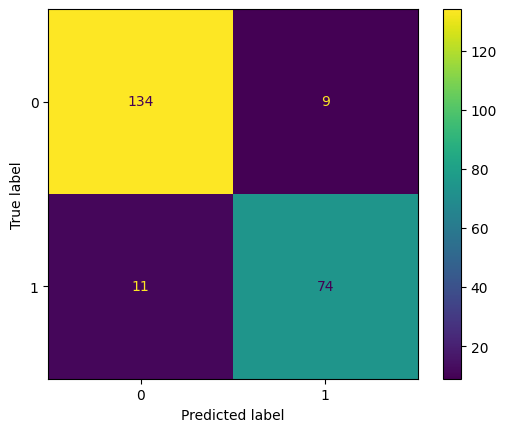

In [ ]:
model_neighb = KNeighborsClassifier(n_neighbors=3)
model_neighb.fit(X_train, Y_train)
Y_neighb = model_neighb.predict(X_test)

show_accuracy(Y_test, Y_neighb)

In [129]:
print(metrics.classification_report(y_true=Y_test, y_pred=Y_neighb))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       143
           1       0.89      0.87      0.88        85

    accuracy                           0.91       228
   macro avg       0.91      0.90      0.91       228
weighted avg       0.91      0.91      0.91       228



### 12. Какое оптимальное число соседей у метода K ближайших соседей? Какая точность при этом достигается?

Перед спецификацией `GridSearchCV` вызовите `np.random.seed(0)` (фиксируем определённый вид случайности).
Подбор осуществляйте на исходных данных методом `GridSearchCV` с параметрами по умолчанию по сетке `[1,3,5,7,9,11,15,21,31]` и мерай качества=точность классификации.

In [230]:
np.random.seed(0)

In [232]:
model_neighb.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
search_space = {"n_neighbors": [1, 3, 5, 7, 9, 11, 15, 21, 31]}
# n_jobs=1 тк были проблемы с паралеллизацией
grid_search = GridSearchCV(
    KNeighborsClassifier(), search_space, scoring="accuracy", refit=True, n_jobs=1
)

grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 21, 31]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_  # параметры наилучшего метода

{'n_neighbors': 11}

In [ ]:
model_neighb_best = KNeighborsClassifier(
    **grid_search.best_params_
)  # инициализация модели наилучшими параметрами
model_neighb_best.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

Accuracy: 0.93


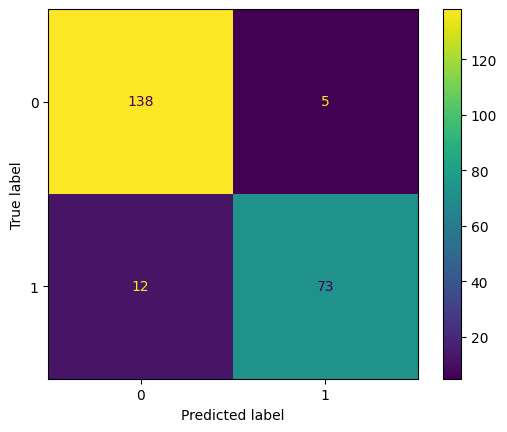

In [236]:
model_neighb_best.fit(X_train, Y_train)
Y_hat = model_neighb_best.predict(X_test)

show_accuracy(Y_test, Y_hat)

### 13. Какая точность у конвейера обработки состоящего из следующих шагов:
    * нормализация признаков (вычитаем среднее и делим на стандартное отклонение каждый признак)
    * K ближайших соседей с наилушим K, найденным выше.

Используйте `sklearn.pipeline.Pipeline`, `StandardScaler`.

In [237]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
# Создадим конвейер обработки данных по разному обрабатывающий вещественные и категориальные признаки.

# Предобработка для вещественных признаков:
numeric_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="median"),
        ),  # пропуски в вещественных признаках заполним медианой
        ("scaler", StandardScaler()),
    ]
)

# Предобработка для категориальных признаков:
categorical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="constant"),
        ),  # пропуски в категориальных признаках заполним константой -1
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Присоединим раздельный препроцессинг и прогностическую модель
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=11)),
    ]
)

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', KNeighborsClassifier(n_neighbors=11))])

Accuracy: 0.96


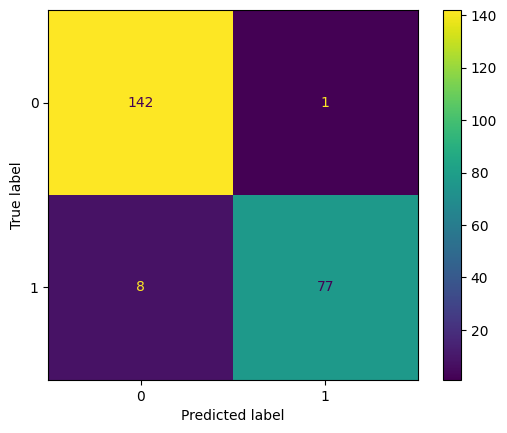

In [239]:
pipe.fit(X_train, Y_train)
Y_hat = pipe.predict(X_test)
show_accuracy(Y_test, Y_hat)

### 14. Какая точность у конвейера обработки выше, если мы подбираем параметры `p` по сетке `[1,2,...10]` и число ближайших соседей по сетке `[1,3,5,7,9,11,15,21,31]`?

Accuracy: 0.96


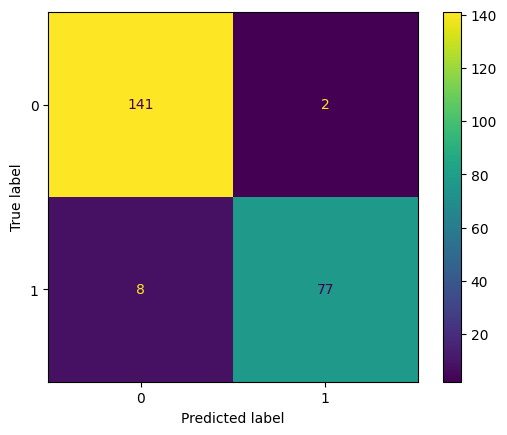

In [ ]:
search_space = {
    "model__p": [i for i in range(1, 11)],
    "model__n_neighbors": [1, 3, 5, 7, 9, 11, 15, 21, 31],
}

grid_search = GridSearchCV(pipe, search_space, scoring="accuracy", refit=True, n_jobs=1)

grid_search.fit(X_train, Y_train)
Y_hat = grid_search.predict(X_test)
show_accuracy(Y_test, Y_hat)

In [241]:
grid_search.best_params_

{'model__n_neighbors': 5, 'model__p': 2}

### 15. Предложите модификацию признаков (удаление и/или добавление новых преобразованных), повышающих точность лучшей модели.

#### Удаление сильно скореллированных признако

In [168]:
X_train_del_corr = X_train.copy()
X_test_del_corr = X_test.copy()

In [175]:
feat_importances.sort_values()

V18    0.003552
V16    0.003580
V10    0.004196
V19    0.004209
V17    0.004681
V15    0.004739
V5     0.004892
V6     0.005762
V20    0.006077
V9     0.006118
V12    0.006479
V30    0.008404
V26    0.008570
V29    0.008635
V25    0.013800
V2     0.014413
V13    0.016235
V22    0.016722
V27    0.017828
V1     0.029776
V4     0.034726
V11    0.035349
V7     0.046589
V14    0.049287
V3     0.064937
V8     0.076597
V21    0.086578
V24    0.093035
V28    0.141911
V23    0.182325
dtype: float64

Выбирая между V21 и V23 оставим V23 тк по feature importance он выше, по той же причине оставим V3, а V1 дропнем

Так же дропнем фичи с fi меньше 0.01

In [180]:
feat_importances = feat_importances.sort_values()

In [184]:
drop_list = feat_importances[(feat_importances.sort_values() < 0.01)].index.tolist()

In [192]:
drop_list += ["V23", "V1"]

In [193]:
X_train_del_corr = X_train_del_corr.drop(drop_list, axis=1, errors="ignore")
X_test_del_corr = X_test_del_corr.drop(drop_list, axis=1, errors="ignore")

In [201]:
numeric_features_del_corr = list(set(numeric_features) - set(drop_list))

In [202]:
numeric_features_del_corr

['V7',
 'V2',
 'V13',
 'V11',
 'V28',
 'V24',
 'V8',
 'V3',
 'V14',
 'V27',
 'V25',
 'V21',
 'V22',
 'V4']

In [ ]:
# Создадим конвейер обработки данных по разному обрабатывающий вещественные и категориальные признаки.

# Предобработка для вещественных признаков:
numeric_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="median"),
        ),  # пропуски в вещественных признаках заполним медианой
        ("scaler", StandardScaler()),
    ]
)

# Предобработка для категориальных признаков:
categorical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="constant"),
        ),  # пропуски в категориальных признаках заполним константой -1
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_del_corr),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Присоединим раздельный препроцессинг и прогностическую модель
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=5, p=2)),
    ]
)

# pipe

Accuracy: 0.95


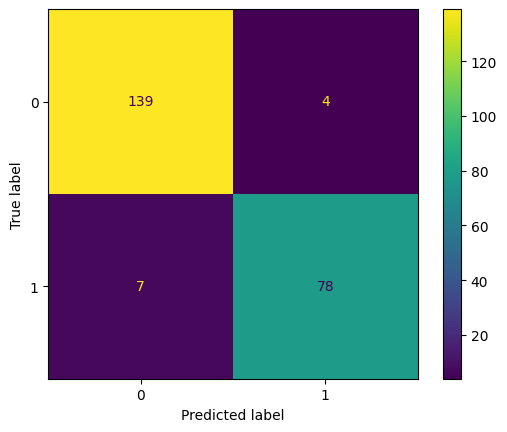

In [243]:
pipe.fit(X_train_del_corr, Y_train)
Y_hat = pipe.predict(X_test_del_corr)
show_accuracy(Y_test, Y_hat)

#### Оставление только топ 10 фичей

In [249]:
X_train_stay_10_top = X_train.copy()
X_test_stay_10_top = X_test.copy()

In [248]:
feat_importances.nlargest(10)

V23    0.182325
V28    0.141911
V24    0.093035
V21    0.086578
V8     0.076597
V3     0.064937
V14    0.049287
V7     0.046589
V11    0.035349
V4     0.034726
dtype: float64

In [253]:
len(X_train_stay_10_top.columns)

30

In [ ]:
drop_list = list(
    set(X_train_stay_10_top.columns) - set(feat_importances.nlargest(10).index)
)

In [256]:
drop_list += ["V23", "V1"]

In [257]:
X_train_stay_10_top = X_train_stay_10_top.drop(drop_list, axis=1, errors="ignore")
X_test_stay_10_top = X_test_stay_10_top.drop(drop_list, axis=1, errors="ignore")

In [261]:
numeric_features_stay_10_top = list(set(numeric_features) - set(drop_list))

In [262]:
numeric_features_stay_10_top

['V7', 'V11', 'V28', 'V24', 'V8', 'V3', 'V14', 'V21', 'V4']

In [ ]:
# Создадим конвейер обработки данных по разному обрабатывающий вещественные и категориальные признаки.

# Предобработка для вещественных признаков:
numeric_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="median"),
        ),  # пропуски в вещественных признаках заполним медианой
        ("scaler", StandardScaler()),
    ]
)

# Предобработка для категориальных признаков:
categorical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="constant"),
        ),  # пропуски в категориальных признаках заполним константой -1
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_stay_10_top),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Присоединим раздельный препроцессинг и прогностическую модель
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=5, p=2)),
    ]
)

# pipe

Accuracy: 0.93


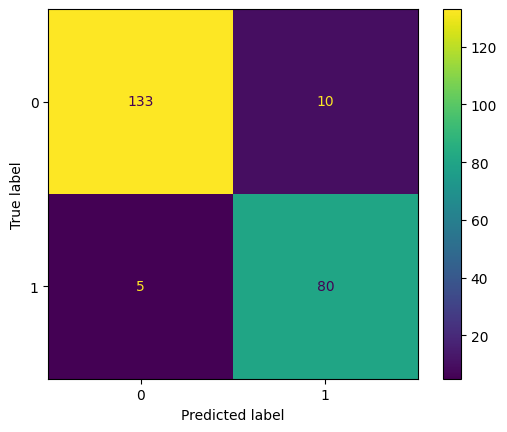

In [264]:
pipe.fit(X_train_del_corr, Y_train)
Y_hat = pipe.predict(X_test_del_corr)
show_accuracy(Y_test, Y_hat)

#### уберем слабо скореллированные фичи с таргетом

In [274]:
drop_not_corr_feat = corr.Y[corr.Y < 0.50].dropna().index.tolist()

In [275]:
drop_not_corr_feat += ["V23", "V1"]

In [276]:
drop_not_corr_feat

['V2',
 'V5',
 'V9',
 'V10',
 'V12',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V22',
 'V25',
 'V29',
 'V30',
 'V23',
 'V1']

In [277]:
X_train_corr_r = X_train.drop(drop_not_corr_feat, axis=1, errors="ignore")
X_test_corr_t = X_test.drop(drop_not_corr_feat, axis=1, errors="ignore")

In [280]:
numeric_features_corr_t = list(set(numeric_features) - set(drop_not_corr_feat))

In [281]:
numeric_features_corr_t

['V7',
 'V13',
 'V11',
 'V28',
 'V26',
 'V6',
 'V24',
 'V8',
 'V3',
 'V14',
 'V27',
 'V21',
 'V4']

In [ ]:
# Создадим конвейер обработки данных по разному обрабатывающий вещественные и категориальные признаки.

# Предобработка для вещественных признаков:
numeric_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="median"),
        ),  # пропуски в вещественных признаках заполним медианой
        ("scaler", StandardScaler()),
    ]
)

# Предобработка для категориальных признаков:
categorical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="constant"),
        ),  # пропуски в категориальных признаках заполним константой -1
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features_corr_t),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Присоединим раздельный препроцессинг и прогностическую модель
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", KNeighborsClassifier(n_neighbors=5, p=2)),
    ]
)

# pipe

Accuracy: 0.92


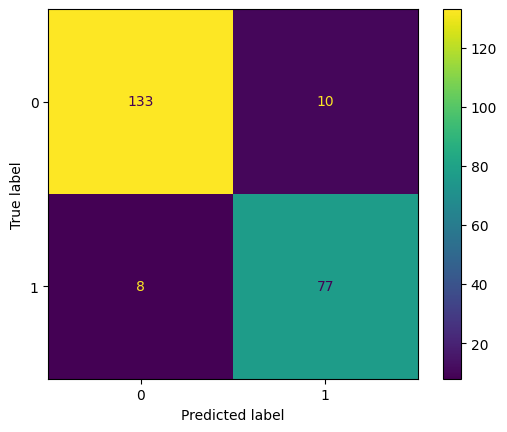

In [285]:
pipe.fit(X_train_corr_r, Y_train)
Y_hat = pipe.predict(X_test_corr_t)
show_accuracy(Y_test, Y_hat)

In [ ]:
for col in X.columns:
    X[col]

In [ ]:
def plot_class_conditional_univariate_distributions(X, Y):
    classes = Y.unique()
    colors = list("brgkcmy")
    for col in X.columns:
        plt.figure()
        counts, bins, _ = plt.hist(
            [X.loc[Y == cl, col] for cl in classes],
            color=colors[: len(classes)],
            label=[f"class {cl}" for cl in classes],
            density=True,
        )
        counts /= counts.sum(axis=1)[:, None]
        # посчитаем разделимость для каждой пары классов и найдем максимальную
        max_diff = 0
        for c1 in classes:
            for c2 in classes:
                if c1 != c2:
                    diff = (
                        np.absolute(counts[c1] - counts[c2]).sum() / 2
                    )  # /2 чтобы макс. значение было 1, когда распределения полностью отличаются
                    max_diff = max(max_diff, diff)

        plt.title(f"{col}: max_diff={max_diff:.02f}")
        plt.xlabel("feature")
        plt.ylabel("density")
        plt.legend()
        plt.show()

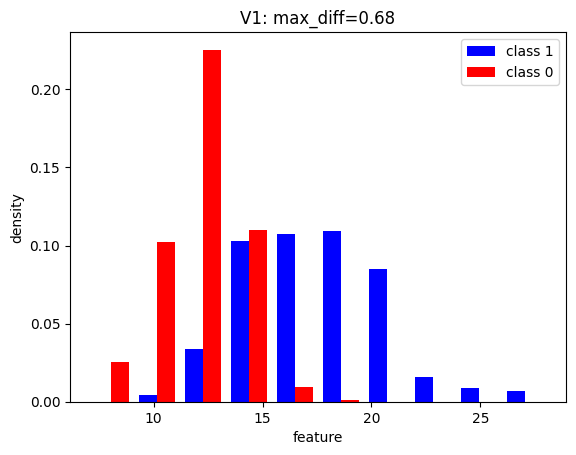

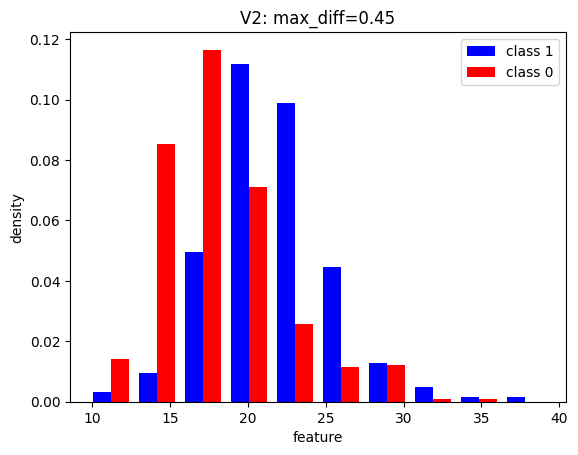

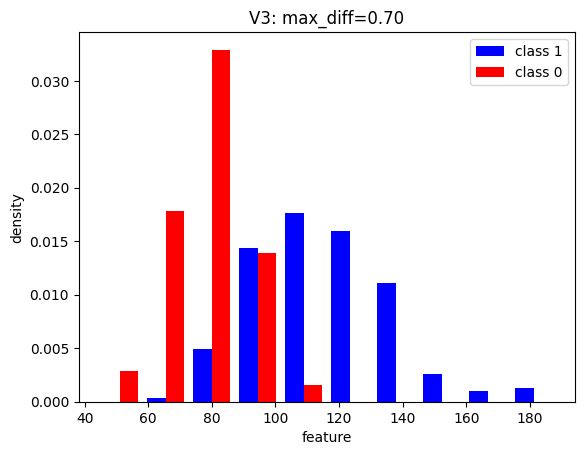

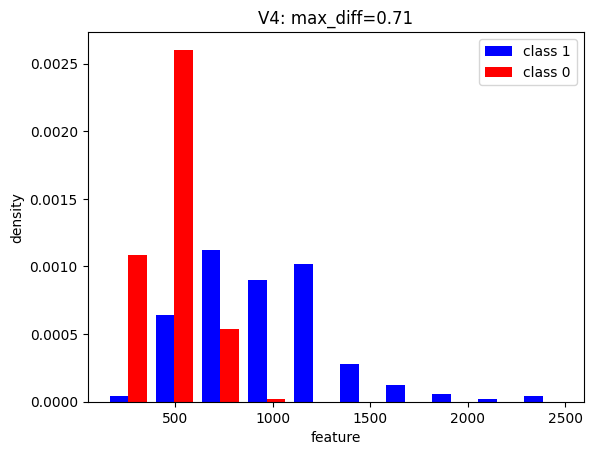

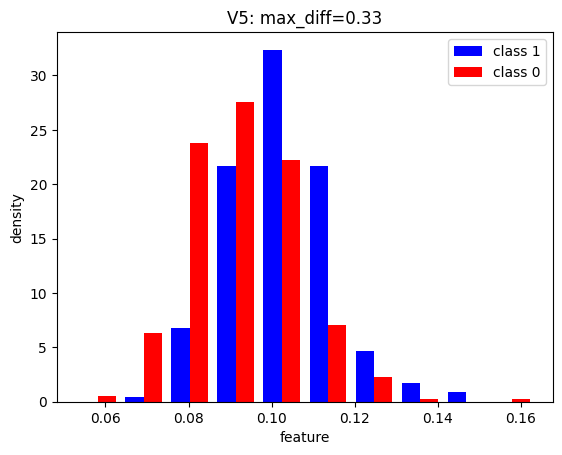

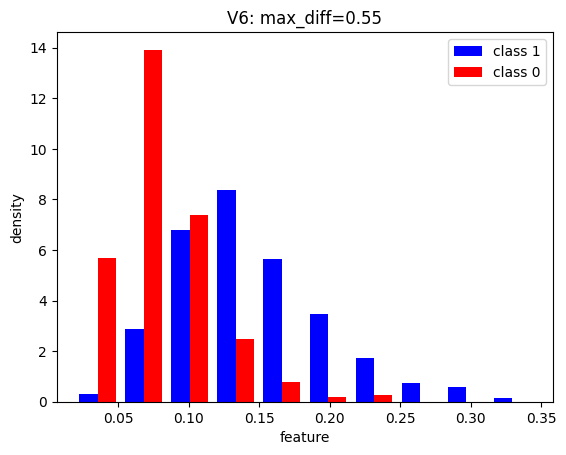

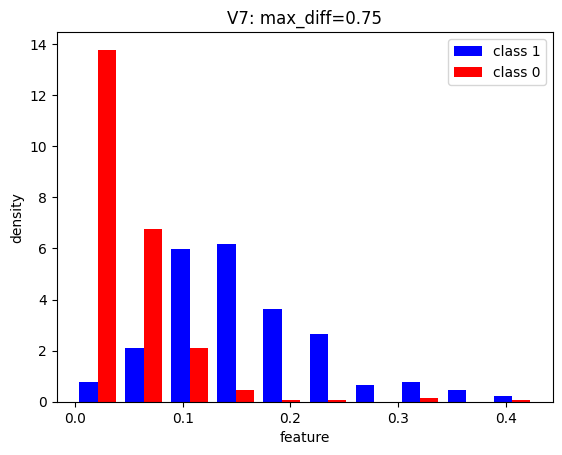

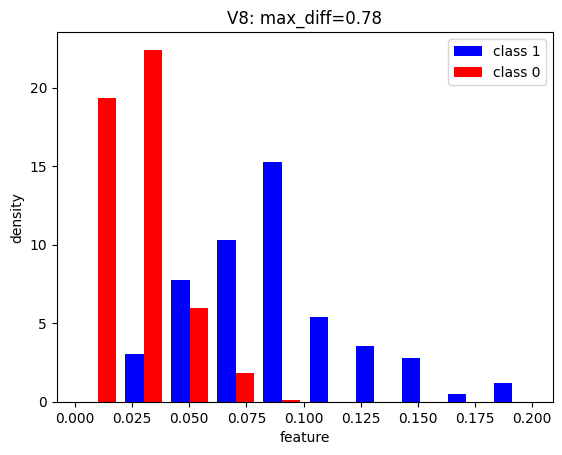

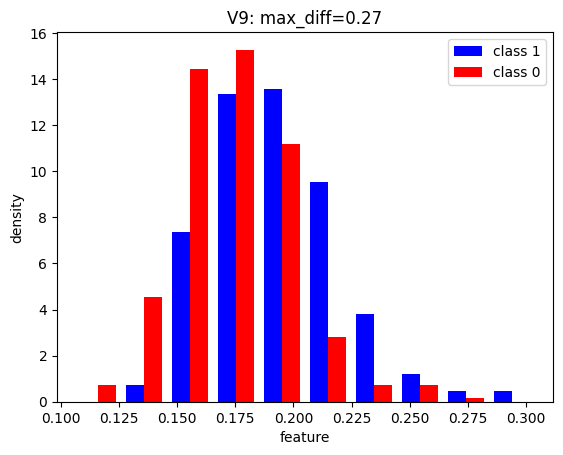

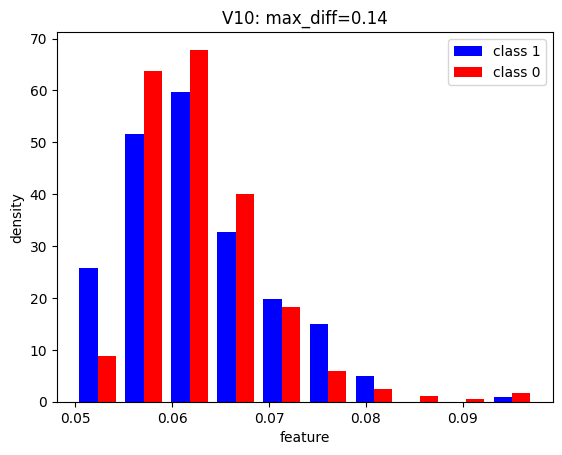

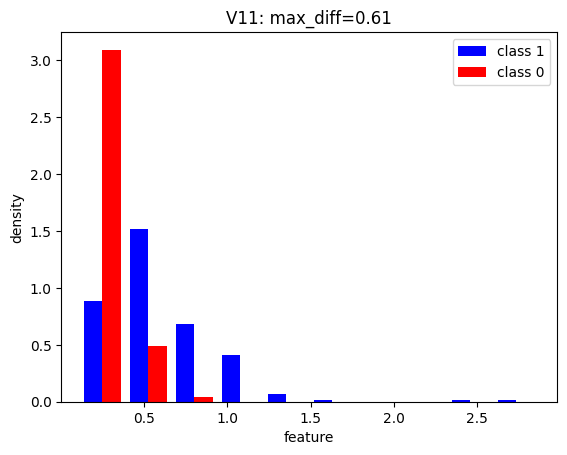

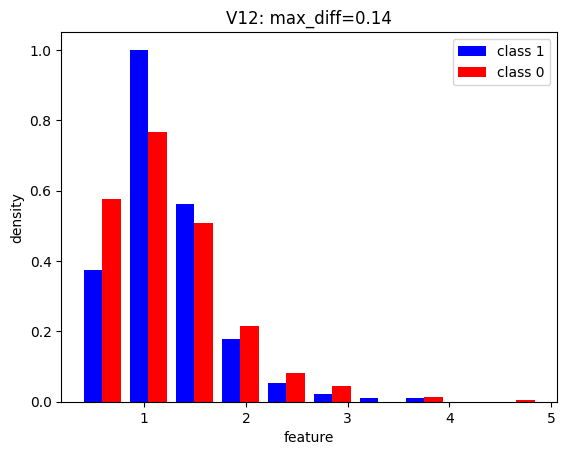

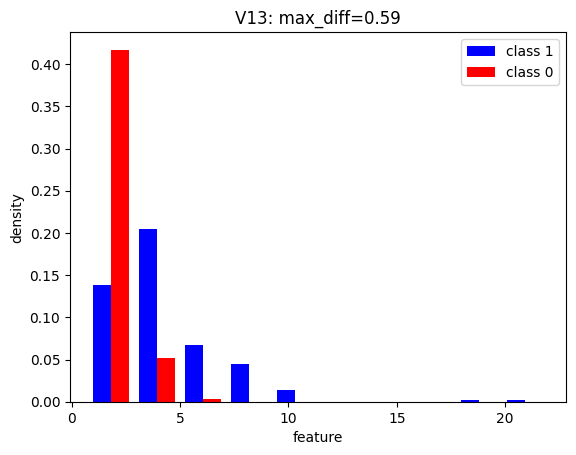

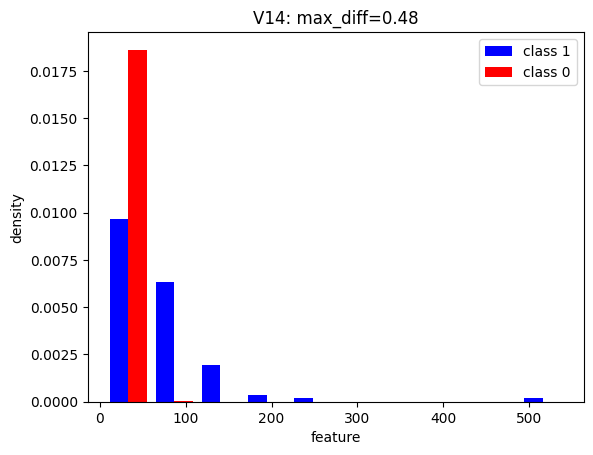

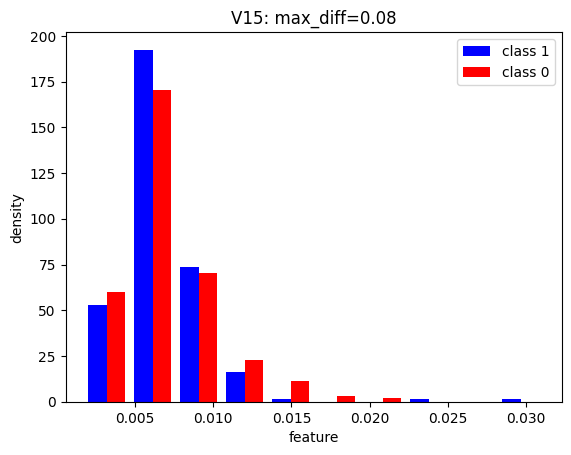

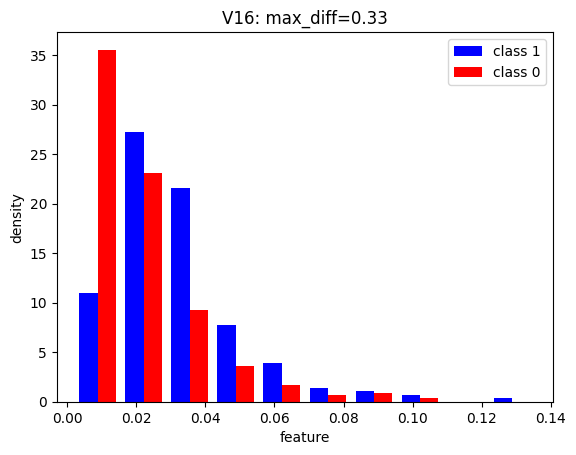

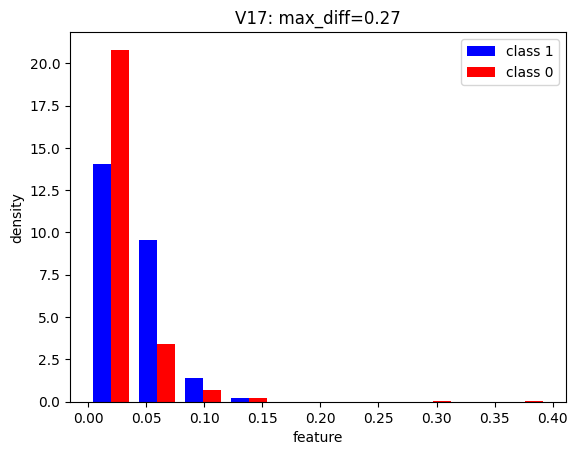

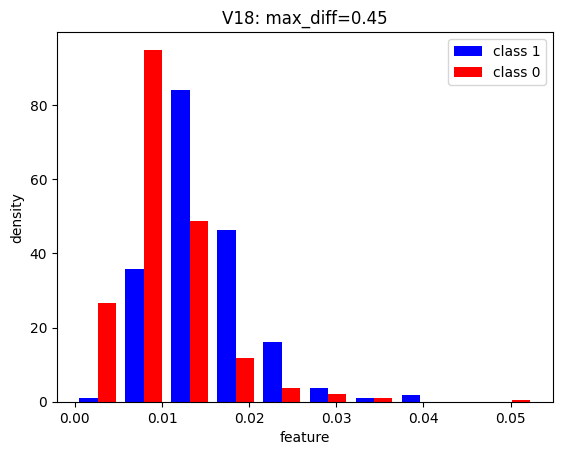

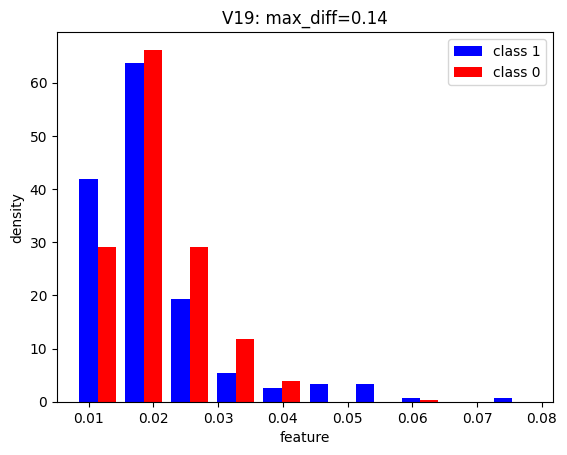

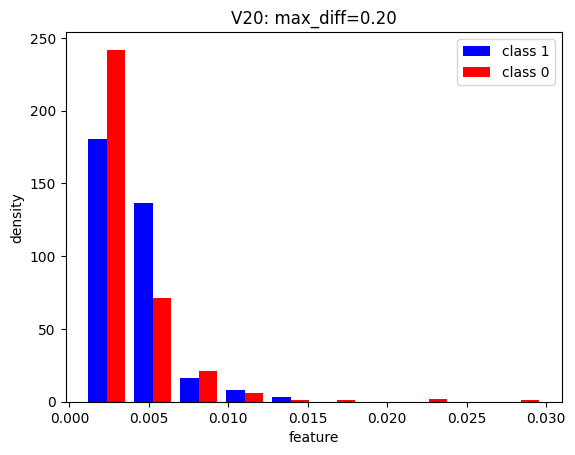

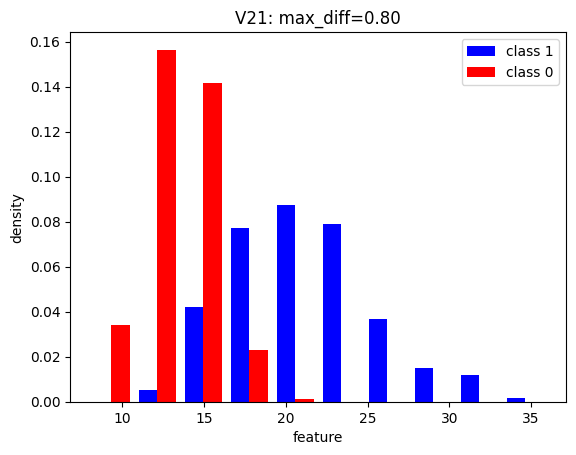

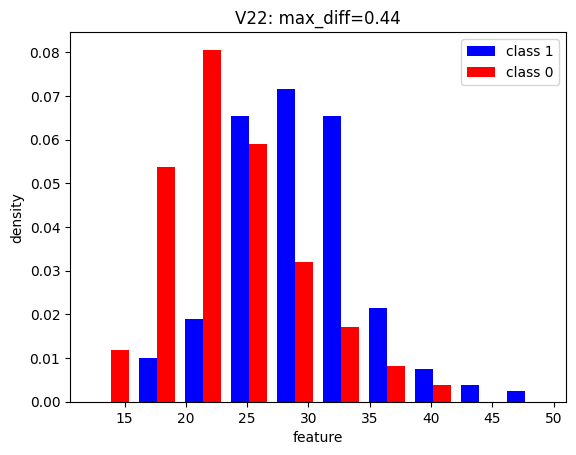

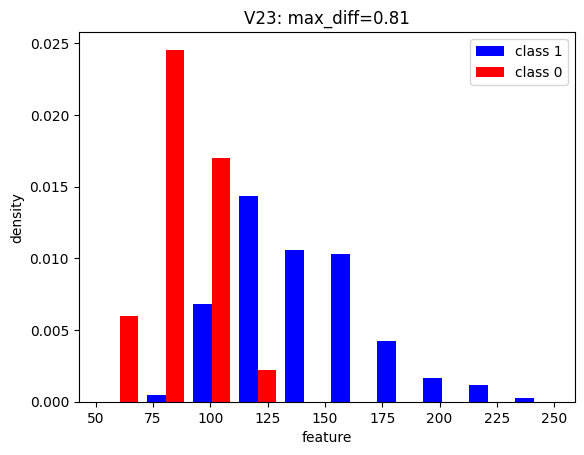

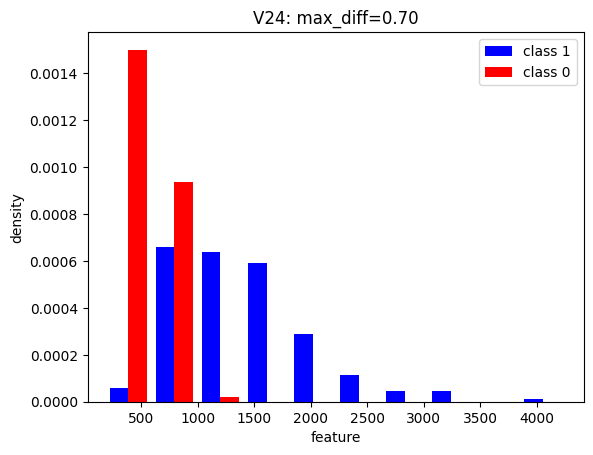

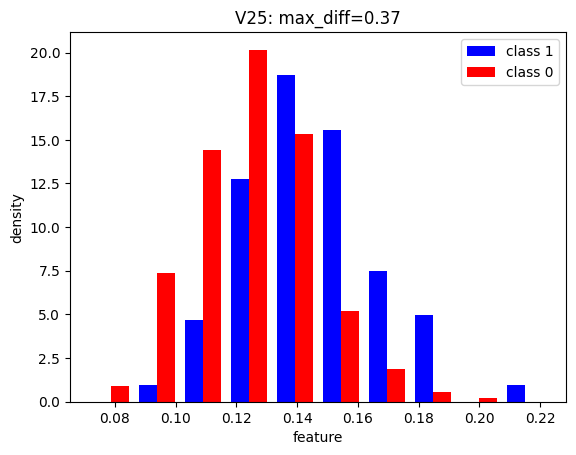

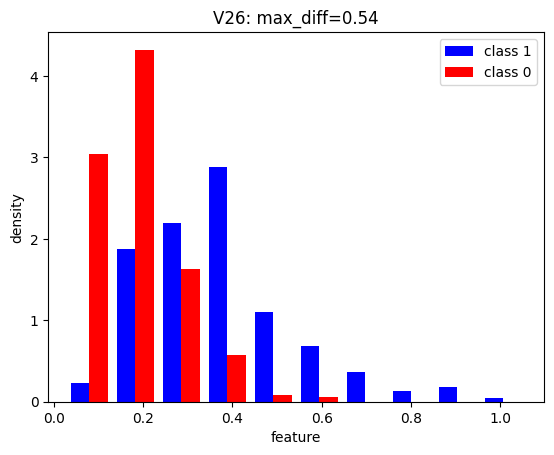

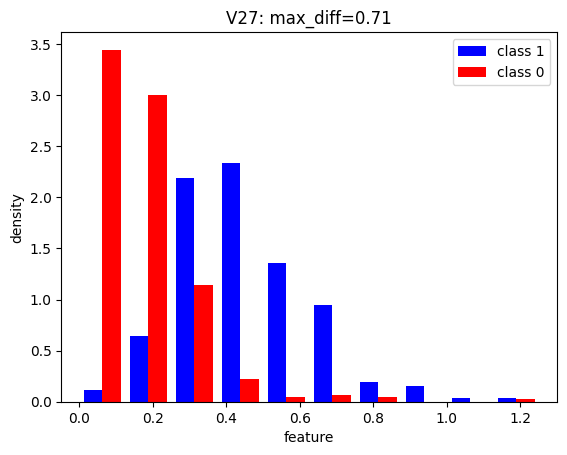

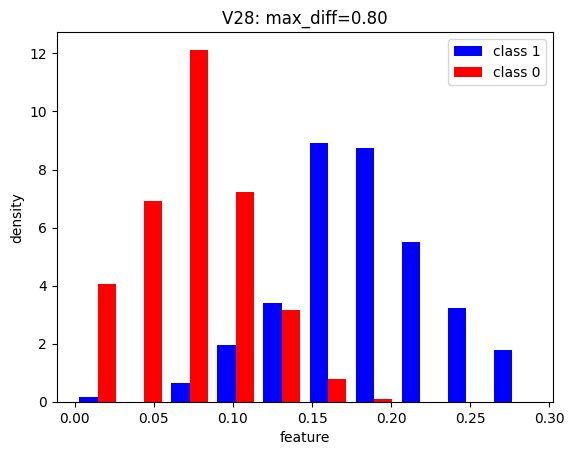

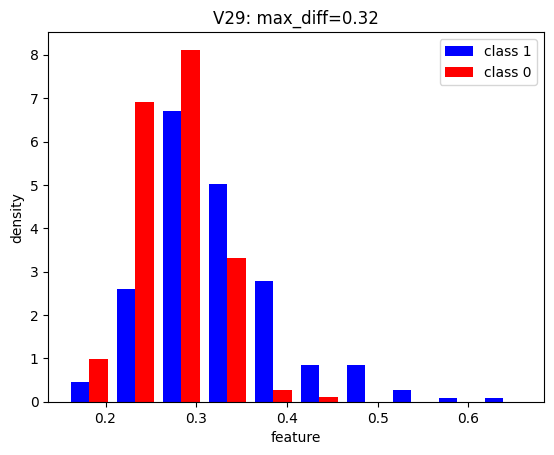

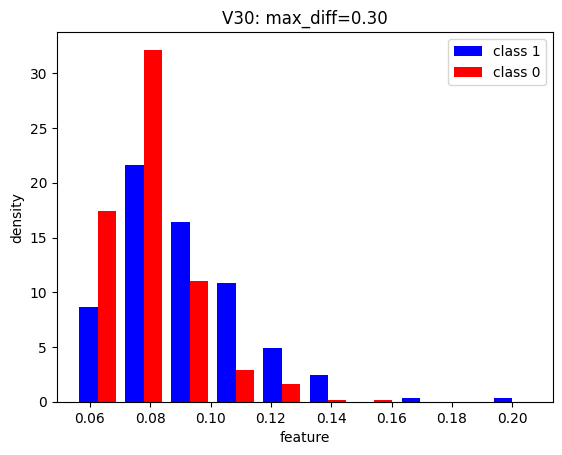

In [ ]:
plot_class_conditional_univariate_distributions(X_del_corr, Y)